## Weather conditions comparison between Buenos Aires, Argentina and Turin, Italy.

Recently, I moved to Turin, Italy from my home city **Buenos Aires**, in **Argentina**.
As an exercise in using my newly acquired Data Processing and Visualizing skills, I decided to find a database to aid me in the comparison of both cities weather conditions, to know what to expect, specially in the upcoming winter. I've been looking forward to the winter season, since in my home town, the Christmas season is during the summer, and it doesn't really snow in the winter.

As a reference, **Buenos Aires** is located 34° South of the Equator while **Turin** is 45° North of the Equator, so, to begin with, the seasons are opposite, meaning Summer is in Dec-Mar in Buenos Aires, while it is in Jun-Sep in Turin.

Additionally, both cities are located in very different landscapes: while Buenos Aires is next to the a River (Rio de la Plata) with an altitude of 25 meters above sea level, Turín lies between mountains and hills, at a 244 meter altitude.

The following databases contain the measurement of weather indicators for **Turin, Italy** *(2010 - 2021)* and **Buenos Aires, Argentina** *(2012 - 2021)*

 - Turin: https://fqcfwdev.labs.coursera.org/edit/Turin%20weather%20info%202010%20-%202021.csv
 - Buenos Aires: https://fqcfwdev.labs.coursera.org/edit/Buenos%20Aires%20weather%20info%202012%20-%202021.csv
 
 The data was retrieved from: https://meteostat.net/en/

In [1]:
# Necessary imports to process data
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter


In [2]:
tu = pd.read_csv('Turin weather info 2010 - 2021.csv')

## Turin, Italy: temperature and precipitation in 2021 vs 2011-2020 period

### Temperatures

Hoping for the snowy winter season, people keep telling me that last year (2021) has not been specially snowy or cold in the winter, or hot in the summer, and that there has been seldom or no rain for the last year (which is an issue on its own).

For these reasons, **the first part of this analysis will compare 2021 temperatures and precipitation with the previous 10 years' records in Turin** to see if, in fact, 2021 was a significantly different year.

In [3]:
# Formatting date and creating new day-month-year columns
tu['date'] = pd.to_datetime(tu['date'], format='%d/%m/%Y')
tu['year'] = tu.date.dt.year
tu['month'] = tu.date.dt.month
tu['day'] = tu.date.dt.day

# Dropping unnecesary columns 
tu = tu.drop(['snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'], axis = 1)

# Filling Nan precipitation values with 0.0
tu['prcp'].fillna(0.0, inplace = True)

Since the amount of missing values in the *tmin*, *tmax* and *tavg* is not significant, I will autofill those missing values with the average between the previous and the following days.

In [4]:
# Checking fot Nan values
tu['tmin'].isnull().sum(), tu['tmax'].isnull().sum(), tu['tavg'].isnull().sum()

(120, 78, 10)

In [5]:
# Replacing Nan values in temperature measuments with the value of the previous non-nan value
tu = tu.fillna(method = 'pad')

#Fist tmax value needs to be replaced manually (value collected from the source for 31/12/2009)
tu.at[0, 'tmax'] = 4.4

# Chack for no more Nan cells
tu['tmin'].isnull().sum(), tu['tmax'].isnull().sum(), tu['tavg'].isnull().sum()

(0, 0, 0)

In [6]:
# Filtering by years 2011 - 2020 (previous 10 years) (and dropping feb 29th)
tu = tu.drop(tu[(tu.month == 2) & (tu.day == 29)].index)

tu11_20 = tu[(tu.year >= 2011) & (tu.year <= 2020)]
#tu11_20['year'].unique()

tu1 = tu11_20.groupby(['month', 'day']).agg({'tavg': 'mean', 'tmin': 'min', 'tmax': 'max'}).reset_index()
tu1['month'] = tu1['month'].apply(lambda x: calendar.month_abbr[x])
#tu1.head()

# Filtering by year 2021
tu21 = tu[tu['year'] == 2021]

#### Record Min and Max Temperatures

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: Parsing '31-12-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


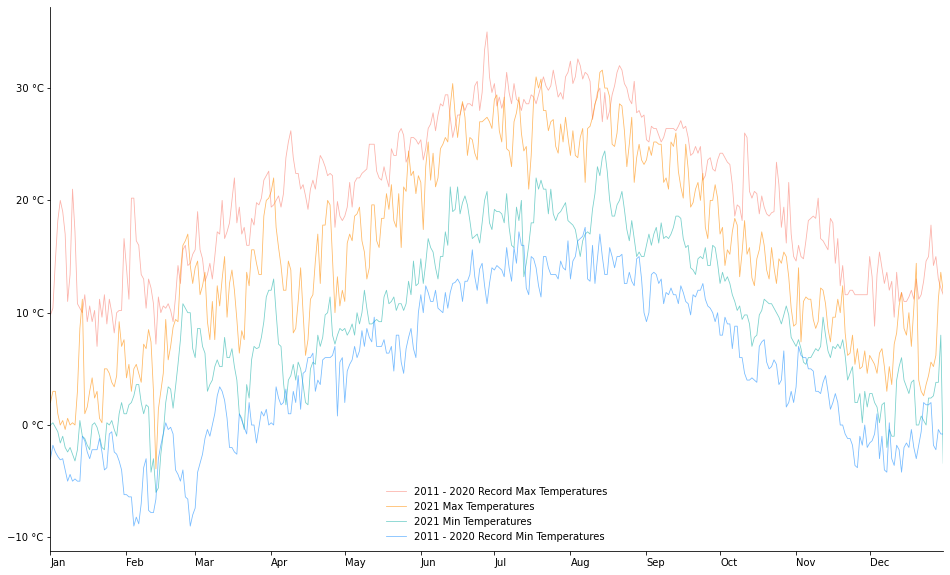

In [7]:
#Setting up plot
#x values are a range of dates from 01/01 to 31/12 (with no 29/02)
doy = pd.date_range('01-01-2022','31-12-2022',freq='d').to_series()

graph1 = plt.figure(figsize=(16,10))

plt.plot(doy, tu1['tmax'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Record Max Temperatures')
plt.plot(doy, tu21['tmax'], color = 'darkorange', alpha = 0.6, linewidth=0.8, label = '2021 Max Temperatures')
plt.plot(doy, tu21['tmin'], color = 'lightseagreen', alpha = 0.6, linewidth=0.8, label = '2021 Min Temperatures')
plt.plot(doy, tu1['tmin'], color = 'dodgerblue', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Record Min Temperatures')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

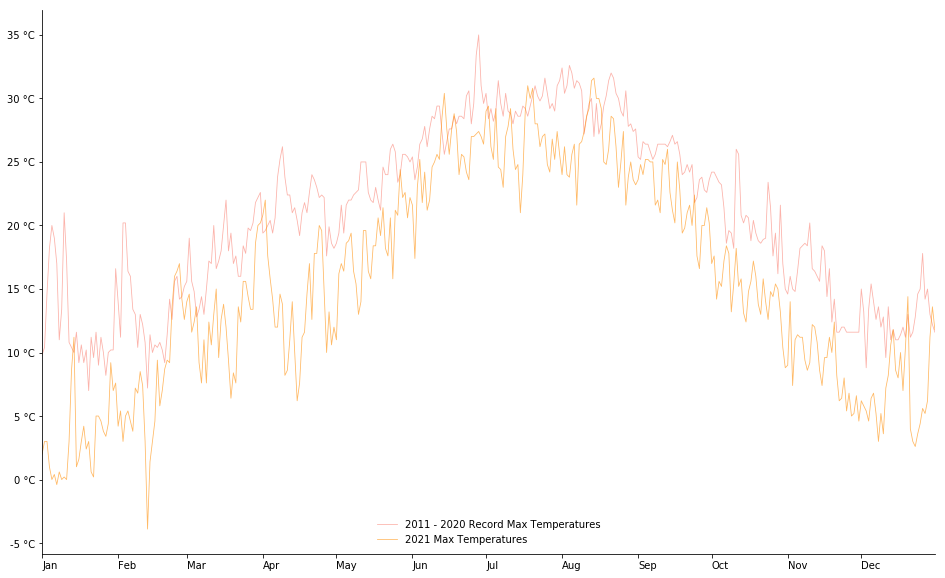

In [9]:
graph2 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu1['tmax'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Record Max Temperatures')
plt.plot(doy, tu21['tmax'], color = 'darkorange', alpha = 0.6, linewidth=0.8, label = '2021 Max Temperatures')

plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


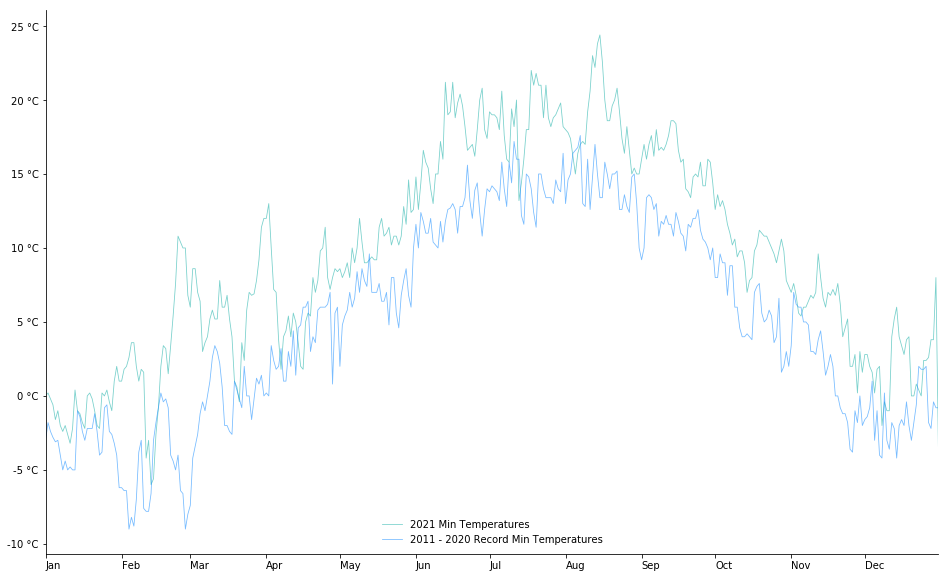

In [10]:
graph3 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu21['tmin'], color = 'lightseagreen', alpha = 0.6, linewidth=0.8, label = '2021 Min Temperatures')
plt.plot(doy, tu1['tmin'], color = 'dodgerblue', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Record Min Temperatures')

plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

From the previous plots we can see that the Max temperatures for 2021 were below the Max record temperatures fot the previous 10 years, and the Min temperatures for 2021 were above the Min record temperatures for the previous 10 years.

A more conservative approach would be to compare them to the average Max and Min temperatures for the previous 10 years in order to see if the record Max and Min temperatures are nor representative.

#### Average Min and Max Temperatures

In [8]:
tu2 = tu11_20.groupby(['month', 'day']).agg({'tavg': 'mean', 'tmin': 'mean', 'tmax': 'mean'}).reset_index()
tu2['month'] = tu2['month'].apply(lambda x: calendar.month_abbr[x])

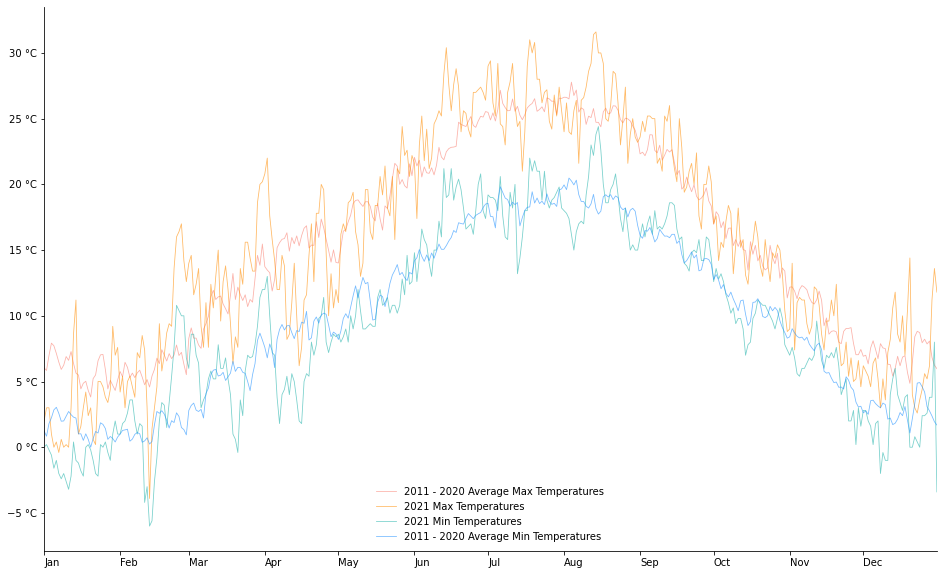

In [9]:
graph4 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu2['tmax'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Average Max Temperatures')
plt.plot(doy, tu21['tmax'], color = 'darkorange', alpha = 0.6, linewidth=0.8, label = '2021 Max Temperatures')
plt.plot(doy, tu21['tmin'], color = 'lightseagreen', alpha = 0.6, linewidth=0.8, label = '2021 Min Temperatures')
plt.plot(doy, tu2['tmin'], color = 'dodgerblue', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Average Min Temperatures')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

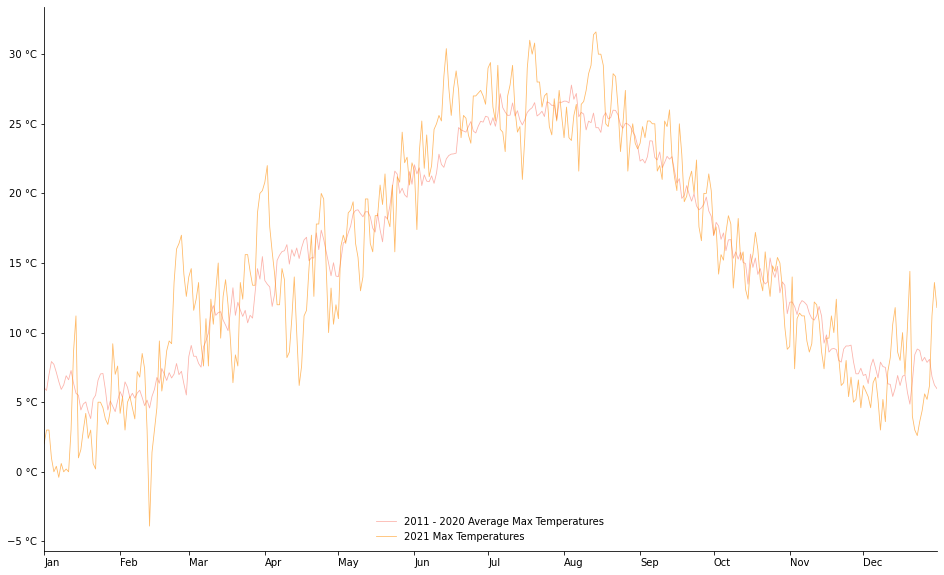

In [10]:
graph5 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu2['tmax'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '2011 - 2020 Average Max Temperatures')
plt.plot(doy, tu21['tmax'], color = 'darkorange', alpha = 0.6, linewidth=0.8, label = '2021 Max Temperatures')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

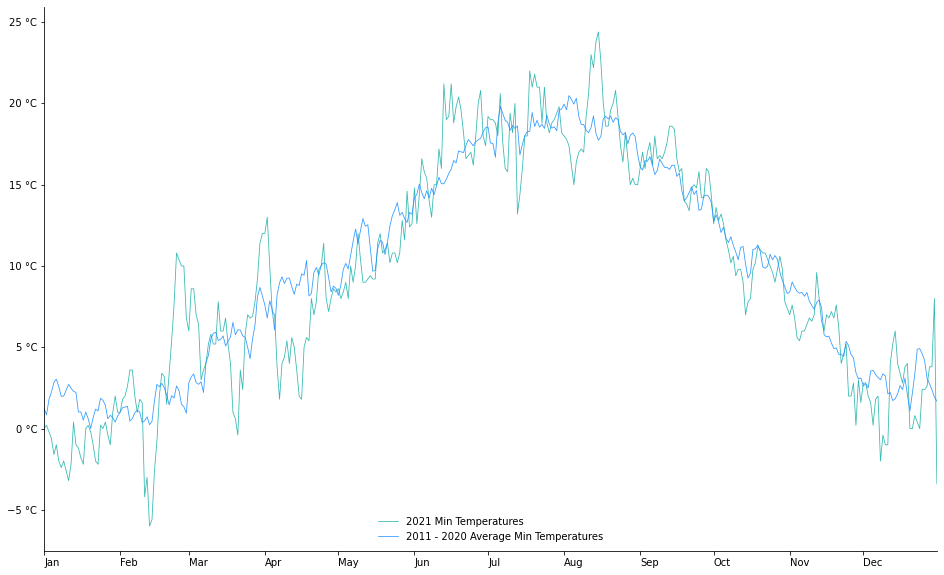

In [11]:
graph6 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu21['tmin'], color = 'lightseagreen', alpha = 0.9, linewidth=0.8, label = '2021 Min Temperatures')
plt.plot(doy, tu2['tmin'], color = 'dodgerblue', alpha = 0.9, linewidth=0.8, label = '2011 - 2020 Average Min Temperatures')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [12]:
(tu2['tmin'].max() - tu2['tmin'].min()), (tu2['tmax'].max() - tu2['tmax'].min())

(20.48, 23.96)

In [13]:
(tu21['tmin'].max() - tu21['tmin'].min()), (tu21['tmax'].max() - tu21['tmax'].min())

(30.4, 35.5)

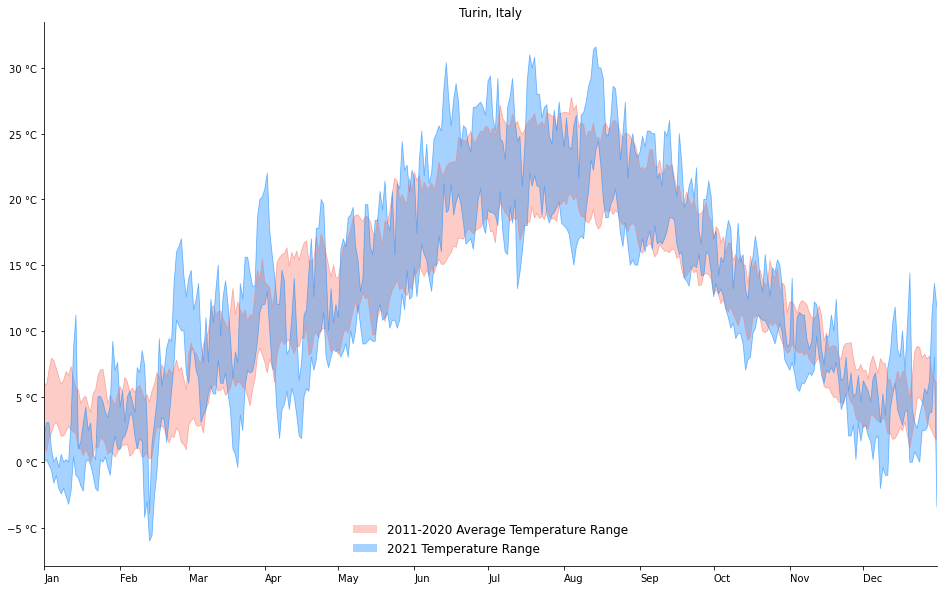

In [14]:
graph4bis = plt.figure(figsize = (16, 10))

plt.plot(doy, tu2['tmax'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '_')
plt.plot(doy, tu2['tmin'], color = 'salmon', alpha = 0.6, linewidth=0.8, label = '_')
plt.gca().fill_between(doy.index, tu2['tmin'], tu2['tmax'], facecolor='salmon', alpha=0.4, label = "2011-2020 Average Temperature Range")

plt.plot(doy, tu21['tmax'], color = 'dodgerblue', alpha = 0.6, linewidth=0.8, label = '_')
plt.plot(doy, tu21['tmin'], color = 'dodgerblue', alpha = 0.6, linewidth=0.8, label = '_')
plt.gca().fill_between(doy.index, tu21['tmin'], tu21['tmax'], facecolor='dodgerblue', alpha=0.4, label = "2021 Temperature Range")


#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'large')
plt.title("Turin, Italy")

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

This apprach shows that, even if 2021 was indeed a year with irregular temperatures, they were not as displaced as the Record Min and record Max plot shows.

Nevertheless, the **range of average minimum temperatures** for 2011 - 2020 was 20.5 C, while in 2021 the same range was 30.4 C, and the **range of average maximum temperatures** for 2011 - 2020 was 24.0 C, while the same range in 2021 was 35.5 C.

#### Test Statistic to conclude if 2021 was indeed __significantly__ different

Having said this, we will conduct a test statistic under the $H_0$ that the average temperatures for the 2011 - 2020 period is equal to the average temperatures for the year 2021.

In [15]:
import scipy.stats as st
(t_ind, p_val) = st.ttest_rel(tu2['tavg'], tu21['tavg'])
(t_ind, p_val)

(2.3661742109466197, 0.018496091899262563)

With a $p-value$ of $0.0185$, we can state with 95% confidence that the average temperatures for 2021 were **significantly different** than the average temperatures for the period 2011 - 2020.

The graph below shows the average temperatures for both the 2011 - 2020 period and 2021, where it is clear that 2021 was indeed an unsual year temperature-wise.

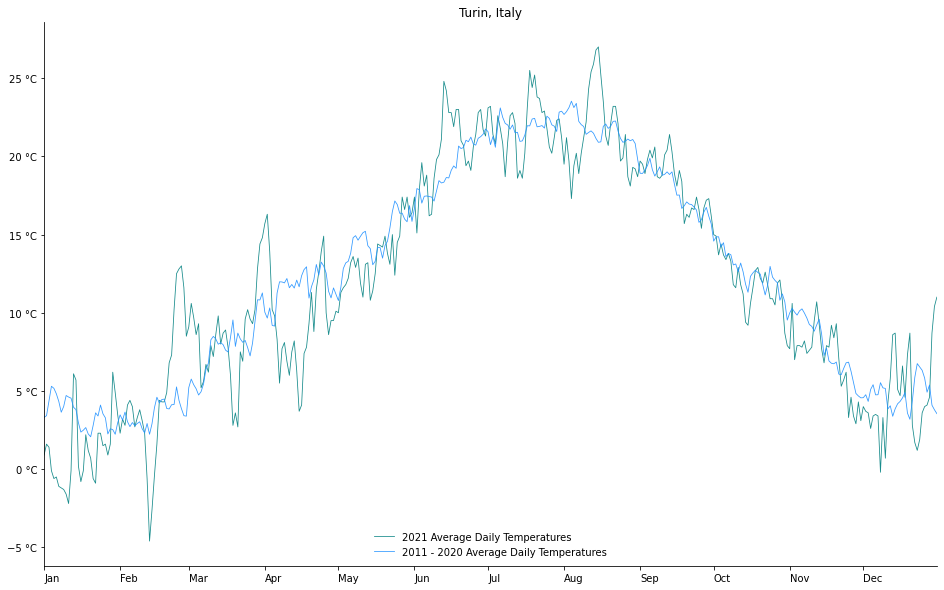

In [16]:
graph7 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu21['tavg'], color = 'teal', alpha = 0.9, linewidth=0.8, label = '2021 Average Daily Temperatures')
plt.plot(doy, tu2['tavg'], color = 'dodgerblue', alpha = 0.9, linewidth=0.8, label = '2011 - 2020 Average Daily Temperatures')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'medium')
plt.title("Turin, Italy")

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Precipitation

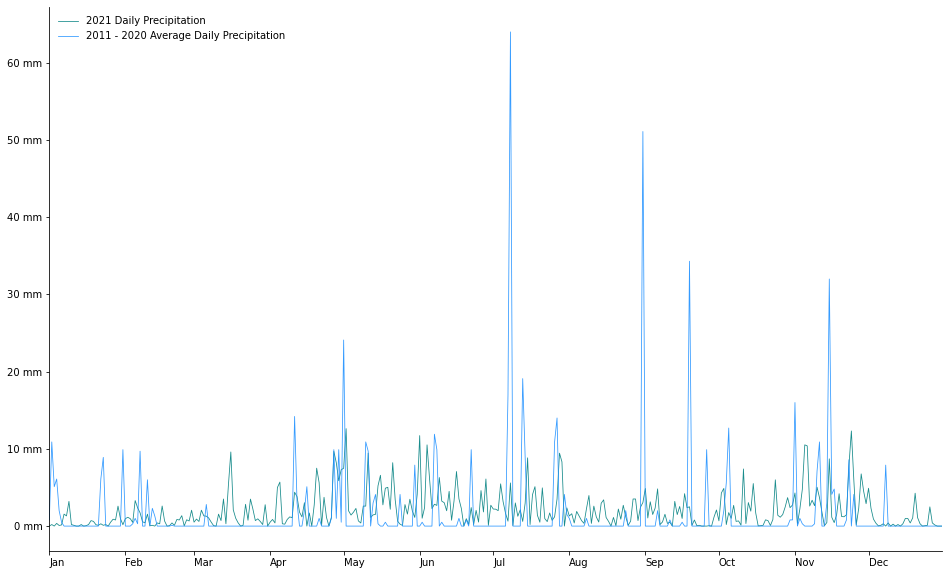

In [17]:
graph8 = plt.figure(figsize = (16, 10))

tu3 = tu11_20.groupby(['month', 'day']).agg({'prcp': 'mean'})

plt.plot(doy, tu3['prcp'], color = 'teal', alpha = 0.9, linewidth=0.8, label = '2021 Daily Precipitation')
plt.plot(doy, tu21['prcp'], color = 'dodgerblue', alpha = 0.9, linewidth=0.8, label = '2011 - 2020 Average Daily Precipitation')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=2, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"mm"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

The previous graph provides some information though it is not clear enough to draw useful insigths.

In [18]:
total_11_20 = tu3['prcp'].sum()
total_21 = tu21['prcp'].sum()
total_11_20, total_21

(747.66, 585.7)

In [19]:
tu5 = tu.groupby('year').agg({'prcp': 'sum'})
tu5

,prcp
year,
2010,1068.6
2011,937.0
2012,680.5
2013,873.1
2014,927.5
2015,614.9
2016,705.3
2017,409.4
2018,915.2


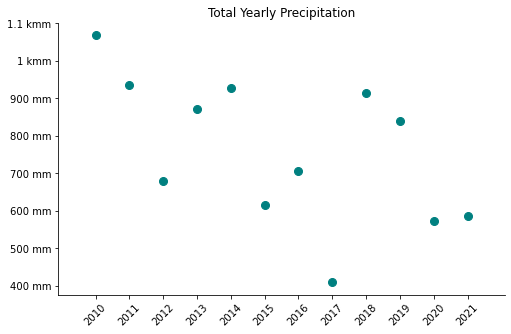

In [20]:
graph8 = plt.figure(figsize = (8, 5))

plt.plot(tu5.index, tu5['prcp'], 'o', color = 'teal', markersize = 8, label = "Total Year Precipitation")

plt.margins(x=0.1)
plt.xticks(tu5.index, fontsize = 'medium', ha = 'center', rotation = 45)
plt.yticks(fontsize = 'medium')

plt.title("Total Yearly Precipitation")
#plt.legend(loc=1, frameon=False, fontsize = 'large')

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"mm"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

We can see that even if 2021 was a year with less precipitations than the average for the 2011-2020 period, from the previous plot we can see that 2020 was also a year of fewer rains, which could explain why the temperatures in 2021 had such a wide range, since water is a temperature regulator.

We can analyze if there is a time-rain correlation, to see if theer is a decreasing trend:

In [21]:
st.pearsonr(tu5.index, tu5['prcp'])

(-0.5650612658887226, 0.05556390337712001)

The Pearson correlation coefficient is -0.565 ehich indicates a negative weak to moderate correlation, which could mean the amount of rains will decrease as years go by.

## Turin vs Buenos Aires

### Temperatures

To begin this analysis it is necessary to shift one of the two datasets, since Turin is in the Northern hemisphere, 45 degrees above the Equator, while Buenos Aires is 36 degrees below the Equator, meaning the seasons are "opposite" during the year. To simplify this analysis, I will perform a 6 month shift in the months of the Buenos Aires dataset, after cleaning and completing missing values.

In [24]:
ba = pd.read_csv('Buenos Aires weather info 2010 - 2021.csv')

In [25]:
# Formatting date and creating new day-month-year columns
ba['date'] = pd.to_datetime(tu['date'], format='%d/%m/%Y')
ba['year'] = ba.date.dt.year
ba['month'] = ba.date.dt.month
ba['day'] = ba.date.dt.day

# Dropping unnecesary columns 
ba = ba.drop(['snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun'], axis = 1)

# Filling Nan precipitation values with 0.0
ba['prcp'].fillna(0.0, inplace = True)

In [26]:
# Checking fot Nan values
ba['tmin'].isnull().sum(), ba['tmax'].isnull().sum(), ba['tavg'].isnull().sum()

(131, 388, 0)

In [27]:
# Replacing Nan values in temperature measuments with the value of the previous non-nan value
ba = ba.fillna(method = 'pad')

# Chack for no more Nan cells
ba['tmin'].isnull().sum(), ba['tmax'].isnull().sum(), ba['tavg'].isnull().sum()

(0, 0, 0)

In [28]:
ba['year'] = ba['year'].apply(lambda x: int(x))
ba['month'] = ba['month'].apply(lambda x: int(x))
ba['day'] = ba['day'].apply(lambda x: int(x))

In [29]:
# Month shift to compare seasons

def shift_month(month):
    if (month + 6) == 12:
        return 12
    else:
        return (month + 6) % 12

ba['new_month'] = ba['month'].apply(shift_month)

# Dropping feb 29th: needs extra work since in the Bs As data base, feb 29th is recorded as a second feb 28th for leap years
# Finding row numbers to drop:
ba[(ba.month == 2) & (ba.day == 28)]
# row indexes = 789, 2250, 3711
ba = ba.drop([789, 2250, 3711], axis = 0).reset_index()

In [32]:
ba.shape[0] == tu.shape[0]

True

In [33]:
ba10_21 = ba.groupby(['new_month', 'day']).agg({'tmin': 'mean', 'tmax': 'mean', 'tavg': 'mean', 'prcp': 'mean'}).reset_index()
tu10_21 = tu.groupby(['month', 'day']).agg({'tmin': 'mean', 'tmax': 'mean', 'tavg': 'mean', 'prcp': 'mean'}).reset_index()
ba10_21['new_month'] = ba10_21['new_month'].apply(lambda x: calendar.month_abbr[x])
tu10_21['month'] = tu10_21['month'].apply(lambda x: calendar.month_abbr[x])
ba10_21.head()

,new_month,day,tmin,tmax,tavg,prcp
0,Jan,1,8.316667,14.850000,11.466667,8.591667
1,Jan,2,8.083333,15.325000,11.858333,0.975000
2,Jan,3,7.950000,15.125000,11.333333,2.183333
3,Jan,4,8.133333,14.691667,11.258333,3.491667
4,Jan,5,8.441667,14.150000,11.241667,1.233333


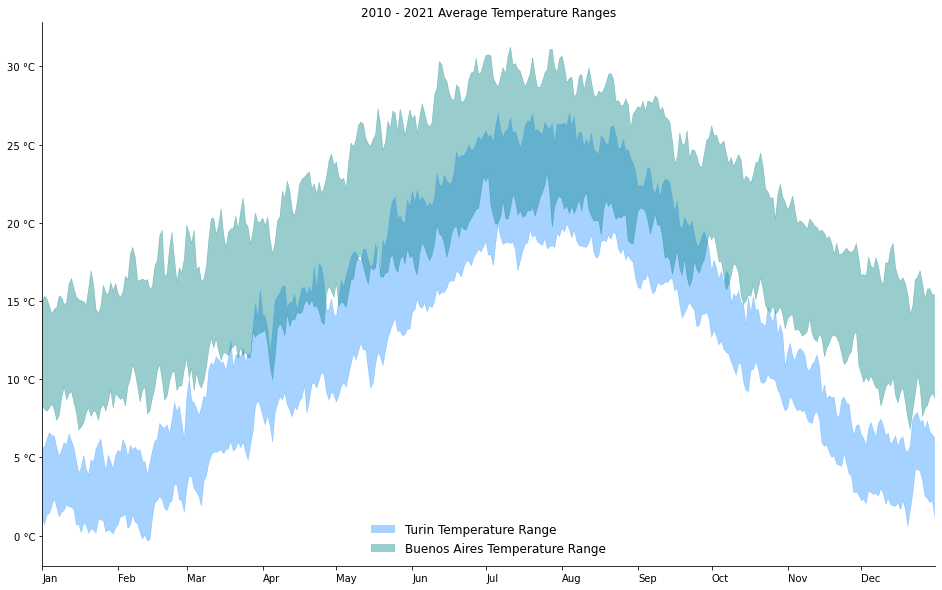

In [34]:
#Setting up plot

graph10 = plt.figure(figsize=(16,10))

plt.plot(doy, tu10_21['tmax'], color = 'dodgerblue', alpha = 0.4, linewidth=0.5, label = "_")
plt.plot(doy, tu10_21['tmin'], color = 'dodgerblue', alpha = 0.4, linewidth=0.5, label = "_")
plt.gca().fill_between(doy.index, tu10_21['tmin'], tu10_21['tmax'], facecolor='dodgerblue', alpha=0.4, label = "Turin Temperature Range")

plt.plot(doy, ba10_21['tmax'], color = 'teal', alpha = 0.4, linewidth=0.5, label = "_")
plt.plot(doy, ba10_21['tmin'], color = 'teal', alpha = 0.4, linewidth=0.5, label = "_")
plt.gca().fill_between(doy.index, ba10_21['tmin'], ba10_21['tmax'], facecolor='teal', alpha=0.4, label = "Buenos Aires Temperature Range")

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=8, frameon=False, fontsize = 'large')
plt.title("2010 - 2021 Average Temperature Ranges")

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"°C"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### Precipitation

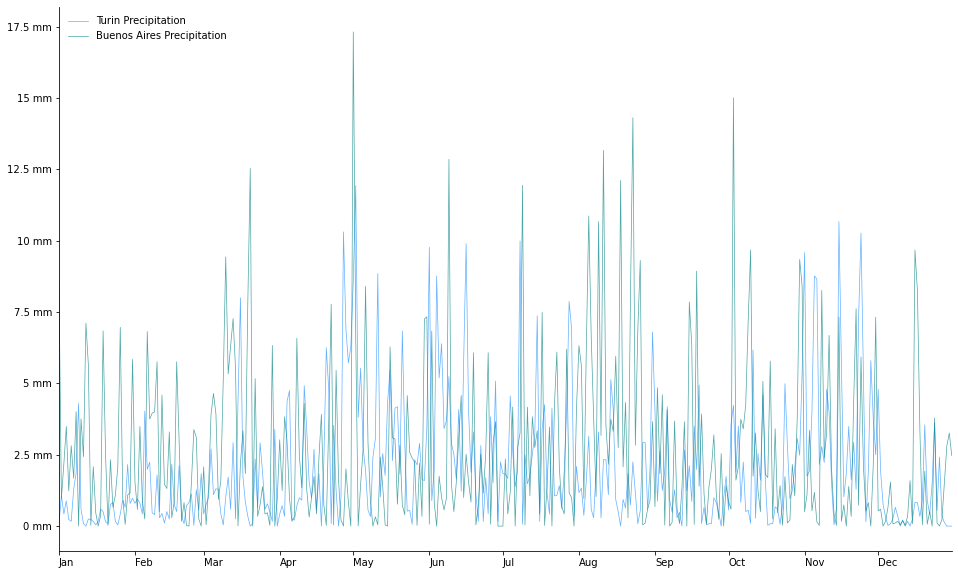

In [35]:
graph11 = plt.figure(figsize = (16, 10))

plt.plot(doy, tu10_21['prcp'], color = 'dodgerblue', alpha = 0.7, linewidth=0.7, label = 'Turin Precipitation')
plt.plot(doy, ba10_21['prcp'], color = 'teal', alpha = 0.7, linewidth=0.7, label = 'Buenos Aires Precipitation')

#plt.gca().fill_between(doy.index, tu1['tmin'], tu1['tmax'], facecolor='grey', alpha=0.20)
plt.margins(x=0)
plt.xticks(fontsize = 'medium', ha = 'left')
plt.yticks(fontsize = 'medium')

plt.legend(loc=2, frameon=False, fontsize = 'medium')

x = plt.gca().xaxis
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
x.set_major_locator(locator)
x.set_major_formatter(fmt)

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"mm"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [36]:
ba10_21p = ba.groupby(['year']).agg({'prcp': 'sum'}).reset_index()

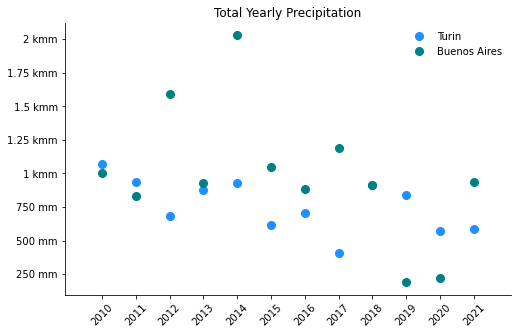

In [37]:
graph12 = plt.figure(figsize = (8, 5))

plt.plot(tu5.index, tu5['prcp'], 'o', color = 'dodgerblue', markersize = 8, label = "Turin")
plt.plot(tu5.index, ba10_21p['prcp'], 'o', color = 'teal', markersize = 8, label = "Buenos Aires")

plt.margins(x=0.1)
plt.xticks(tu5.index, fontsize = 'medium', ha = 'center', rotation = 45)
plt.yticks(fontsize = 'medium')

plt.title("Total Yearly Precipitation")
plt.legend(loc=1, frameon=False, fontsize = 'medium')

y = plt.gca().yaxis
y.set_major_formatter(EngFormatter(unit=u"mm"))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

The previous plots indicate that buenos Aires has a higher and wider average temperature range and, for most years, it rains more in Buenos Aires than in Turin. The only thing I will add, which was not part of the scope of this analysis, is that Turin has seasonal snow, while Buenos Aires does not, which could account for the difference in precipitation.

Now I know what to expect in my __new__ home town.